In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [5]:
# ignorando alertas (não erros)

import warnings
warnings.filterwarnings('ignore')

In [6]:
# importando o dataset
df = pd.read_csv('dataset/data-set-clube-new-v2.csv', sep=';')

In [7]:
# checando as 3 primeiras linhas do dataset
df.head(3)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,38810,CANCELADO,24,0,0,0
1,54088,CANCELADO,0,0,0,0
2,31324,CANCELADO,12,1,2,4


In [8]:
# checando as 3 últimas linhas do dataset
df.tail(10)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
3017,53168,ATIVO,0,7,1,3
3018,53789,ATIVO,0,4,1,31
3019,53787,ATIVO,1,1,4,81
3020,53948,ATIVO,0,3,1,59
3021,54030,ATIVO,0,0,0,0
3022,54283,ATIVO,1,1,0,12
3023,54433,ATIVO,0,1,1,1
3024,54449,ATIVO,2,1,0,1
3025,54474,ATIVO,0,1,0,0
3026,49083,ATIVO,51,4,12,15


In [9]:
# quantidade de linhas e colunas do dataset
print(df.shape)

(3027, 6)


In [10]:
# conferindo se existe valor nulo no dataset
df.isnull().values.any()

False

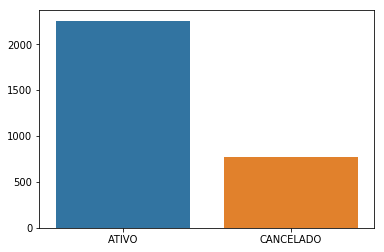

In [11]:
status = df["status"].value_counts()
sns.barplot(status.index, status.values)

In [12]:
# Após a analise do gráfico acima, podemos ver que a maioria do dataset tem o "status" cancelado e ...

status_ativo = df["status"][df["status"] == "CANCELADO"]
print("Porcentagem de Status Ativo = "+str((status_ativo.shape[0] / df["status"].shape[0]) * 100))

Porcentagem de Status Ativo = 25.47076313181368


In [13]:
# ... a minoria está com status ATIVO
status_ativo = df["status"][df["status"] == "ATIVO"]
print("Porcentagem de Status Ativo = "+str((status_ativo.shape[0] / df["status"].shape[0]) * 100))

Porcentagem de Status Ativo = 74.52923686818632


In [14]:
# describe dataset

# count = quantidade
# mean = média
# std = desvio padrão
# min = valor mínimo
# max = valor máximo

df.describe()

,id_socio,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
count,3027.000000,3027.000000,3027.000000,3027.000000,3027.000000
mean,23457.673274,10.601255,4.386852,3.212752,16.846383
std,14843.083641,10.743290,7.017163,5.761192,42.621343
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,10650.500000,0.000000,0.000000,0.000000,0.000000
50%,25490.000000,10.000000,0.000000,0.000000,0.000000
75%,35382.500000,24.000000,6.000000,4.000000,12.000000
max,54485.000000,55.000000,53.000000,39.000000,490.000000


In [15]:
# Checando alguns resultados do describe
maximo = df['qtde_frequencia_ano'] == 490
maximo = df[maximo]
maximo

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
2488,34836,ATIVO,12,12,0,490


In [16]:
# Checando alguns resultados do describe
maximo = df['qtde_em_aberto'] == 53
maximo = df[maximo]
maximo

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
2180,29011,ATIVO,53,19,9,174


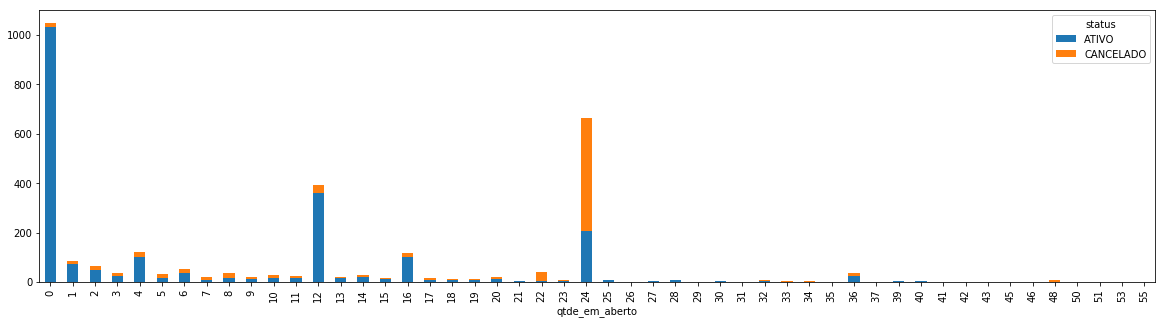

In [17]:
# Relação das variáveis status e parcelas em aberto
# Podemos analisar que a maior parte dos cancelamentos não tinham parcelas em aberto.


df.groupby(["qtde_em_aberto", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5))

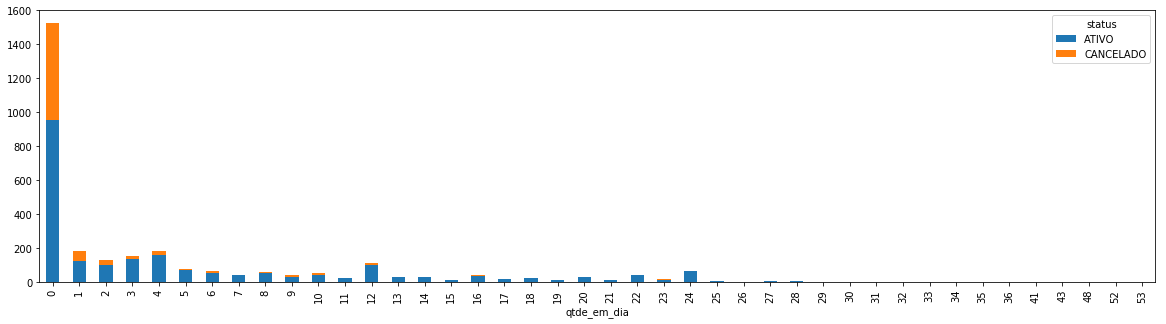

In [18]:
# Relação das variáveis status e parcelas em dia
df.groupby(["qtde_em_dia", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,5))

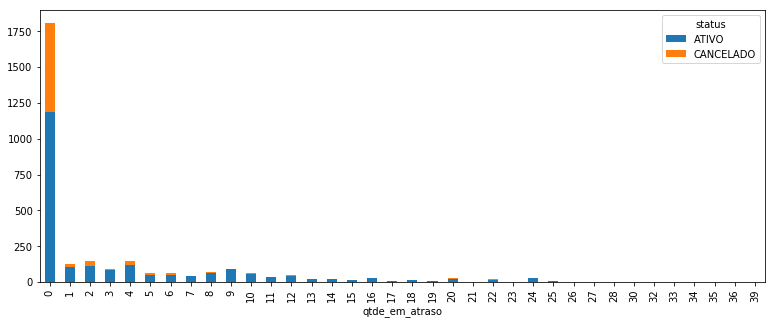

In [19]:
# Relação das variáveis status e quantidade de parcelas em atraso
df.groupby(["qtde_em_atraso", "status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(13,5))

In [20]:
# Todos os Status cancelados

cancelados = df["status"] == "CANCELADO"
cancelados = df[cancelados]
print(cancelados)

      id_socio     status  qtde_em_aberto  qtde_em_dia  qtde_em_atraso  \
0        38810  CANCELADO              24            0               0   
1        54088  CANCELADO               0            0               0   
2        31324  CANCELADO              12            1               2   
3        34368  CANCELADO               9            1               2   
4        27004  CANCELADO              14            1               0   
5        13375  CANCELADO               9            1               2   
6        10326  CANCELADO              20            0               4   
7        28512  CANCELADO              14            0               0   
12       45628  CANCELADO              18            2               5   
24       41631  CANCELADO               8            6               4   
75       31344  CANCELADO               8           16               0   
104      33556  CANCELADO              19            3               6   
107       8760  CANCELADO             

In [21]:
# Todos os Status cancelados

# Podemos observar que as colunas qtde_em_aberto, qtde_em_dia e qtde_em_atraso
# estão zeradas, o que dificuta a compreensão, pois a coluna qtde_em_dia é oposta a qtde_em_atraso?

# uma sugestão para uma melhor análise seria a data de cadastro do sócio e a data da saída?
# Conferir a possibilidade com o Reinaldo.

# Uma dúvida: um sócio tem condições para abandonar o clube? 

ativos = df["status"] == "ATIVO"
ativos = df[ativos]
ativos.head(5)
print(ativos)

      id_socio status  qtde_em_aberto  qtde_em_dia  qtde_em_atraso  \
8            5  ATIVO               4            0               0   
9           31  ATIVO               4            0               0   
10          38  ATIVO              24            0               0   
11       29811  ATIVO              24            0               0   
13          60  ATIVO               4            0               0   
14       25376  ATIVO               0            8               4   
15         168  ATIVO               4            0               0   
16       40449  ATIVO              24            0               0   
17       31275  ATIVO               0           23               1   
18          96  ATIVO               4            0               0   
19       12740  ATIVO               8            1              16   
20       29552  ATIVO               4            0               0   
21          46  ATIVO               4            0               0   
22          33  ATIV

In [22]:
# Passando os todas as colunas para o tipo inteiro

label_encoder = preprocessing.LabelEncoder()

df['id_socio'] = label_encoder.fit_transform(df['id_socio'])
df['status'] = label_encoder.fit_transform(df['status'])
df['qtde_em_aberto'] = label_encoder.fit_transform(df['qtde_em_aberto'])
df['qtde_em_dia'] = label_encoder.fit_transform(df['qtde_em_dia'])
df['qtde_em_atraso'] = label_encoder.fit_transform(df['qtde_em_atraso'])

print (df.dtypes)

id_socio               int64
status                 int64
qtde_em_aberto         int64
qtde_em_dia            int64
qtde_em_atraso         int64
qtde_frequencia_ano    int64
dtype: object


In [23]:
df.head()

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,2464,1,24,0,0,0
1,3010,1,0,0,0,0
2,1885,1,12,1,2,4
3,2179,1,9,1,2,0
4,1604,1,14,1,0,7


In [24]:
# identificando a correlação entre as variáveis
# Correlação não implica causalidade

def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

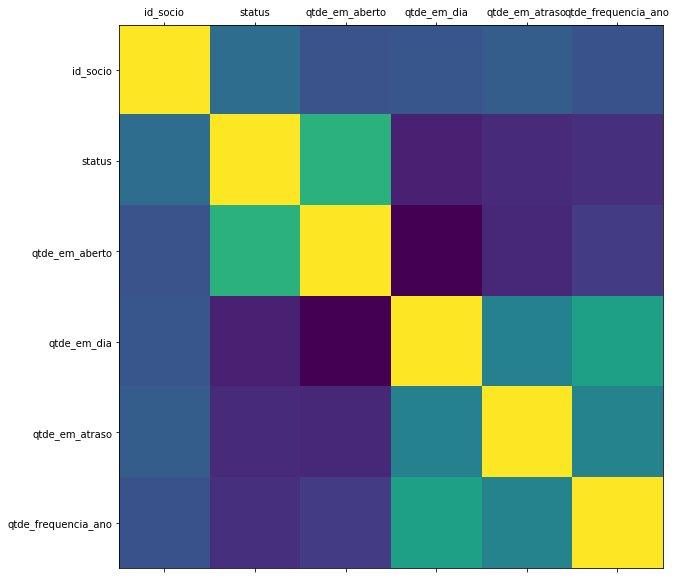

In [25]:
# criando o gráfico da função acima

plot_corr(df)

In [26]:
# Visualizando a correlação em tabela
# Coeficiente de correlação:
   
    # +1 = forte correlação positiva
    # 0 = não há correlação
    # -1 forte correlação negativa
df.corr()

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
id_socio,1.000000,0.112373,-0.030205,-0.015215,0.025774,-0.033012
status,0.112373,1.000000,0.499130,-0.258259,-0.218673,-0.193490
qtde_em_aberto,-0.030205,0.499130,1.000000,-0.383364,-0.226551,-0.137295
qtde_em_dia,-0.015215,-0.258259,-0.383364,1.000000,0.224577,0.403122
qtde_em_atraso,0.025774,-0.218673,-0.226551,0.224577,1.000000,0.237265
qtde_frequencia_ano,-0.033012,-0.193490,-0.137295,0.403122,0.237265,1.000000


In [27]:
# Definindo boolean para a coluna Status
status_map = {True: 1, False : 0}

In [28]:
df['status'] = df['status'].map(status_map)

In [29]:
# Conferindo até achar os 2 status: 0 e 1.
df.head(7)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,2464,1,24,0,0,0
1,3010,1,0,0,0,0
2,1885,1,12,1,2,4
3,2179,1,9,1,2,0
4,1604,1,14,1,0,7
5,1474,1,9,1,2,1
6,655,1,20,0,4,25


In [30]:
# Seleção de variáveis (Feature Selection)
atributos = ['qtde_em_aberto', 'qtde_em_dia', 'qtde_em_atraso', 'qtde_frequencia_ano']

In [31]:
# Variável para ser prevista
atrib_prev = ['status']

In [32]:
# Criando os objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [33]:
# Definindo a taxa de split
split_test_size = 0.30

In [34]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)

In [35]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.97% nos dados de treino
30.03% nos dados de teste


In [36]:
# Verificando o Split

print("Original True: {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 1]),
                                             (len(df.loc[df['status'] == 1])/len(df.index) * 100)))

print("Original False: {0} ({1:0.2f}%)".format(len(df.loc[df['status'] == 0]),
                                             (len(df.loc[df['status'] == 0])/len(df.index) * 100)))
print("")
print("Training True: {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]),
                                             (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False: {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]),
                                             (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))

print("")
print("Test True: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]),
                                             (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False: {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]),
                                             (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True: 771 (25.47%)
Original False: 2256 (74.53%)

Training True: 530 (25.02%)
Training False: 1588 (74.98%)

Test True: 241 (26.51%)
Test False: 668 (73.49%)


In [37]:
df.head(7)

,id_socio,status,qtde_em_aberto,qtde_em_dia,qtde_em_atraso,qtde_frequencia_ano
0,2464,1,24,0,0,0
1,3010,1,0,0,0,0
2,1885,1,12,1,2,4
3,2179,1,9,1,2,0
4,1604,1,14,1,0,7
5,1474,1,9,1,2,1
6,655,1,20,0,4,25


In [38]:
# Construindo e treinando o modelo preditivo
# Utilizando um classificador de Naive Bayes

modelo_v1 = GaussianNB()

In [39]:
# Treinando o modelo

modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
# Verificando a exatidão no modelo nos dados de treino

nb_predict_train = modelo_v1.predict(X_treino)

print("Exatidão (Accuracy): {0: .4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy):  0.7191



In [41]:
# Verificando a exatidão no modelo nos dados de teste

nb_predict_test = modelo_v1.predict(X_teste)

print("Exatidão (Accuracy): {0: .4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy):  0.7327



In [42]:
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[210  31]
 [212 456]]

Classification Report
              precision    recall  f1-score   support

           1       0.50      0.87      0.63       241
           0       0.94      0.68      0.79       668

   micro avg       0.73      0.73      0.73       909
   macro avg       0.72      0.78      0.71       909
weighted avg       0.82      0.73      0.75       909



In [43]:
# otimizando o modelo com RandomForest

modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [44]:
# Exatidão da base de treino
rf_redict_train = modelo_v2.predict(X_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, rf_redict_train)))

Exatidão (Accuracy): 0.9155


In [45]:
# Exatidão da base de test
rf_redict_test = modelo_v2.predict(X_teste)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_redict_test)))

Exatidão (Accuracy): 0.8603
